In [1]:
from dim_reduce import *
df = get_innova_df_normalized(include_max_weight = False)
# df = get_innova_df()

In [5]:
cols_quant_reduced = {key:val for key, val in cols_quantitative.items() if key != "max_weight"}
pca = SparsePCA(n_components=2).fit(df[cols_quant_reduced])
projected = pca.transform(df[cols_quant_reduced])

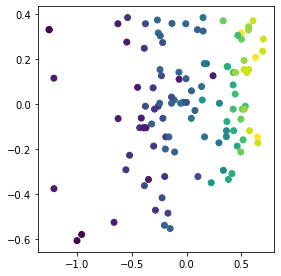

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
fig.tight_layout()
feature = "turn"
ax.scatter(projected[:, 0], projected[:, 1], c=df[feature])

In [7]:
[coefs_x, coefs_y] = list(pca.components_)
print(coefs_x)
print(coefs_y)

[ 0.         -0.33586611 -0.33664139 -0.32096183  0.62093605 -0.21822345
 -0.487511    0.        ]
[0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
for col, coef_x in zip(cols_quantitative, coefs_x):
    if coef_x:
        print(f"{col:>21} * {coef_x:9.6f}")
print()
for col, coef_y in zip(cols_quantitative, coefs_y):
    if coef_y:
        print(f"{col:>21} * {coef_y:9.6f}")

             diameter * -0.335866
               height * -0.336641
            rim_depth * -0.320962
  inside_rim_diameter *  0.620936
        rim_thickness * -0.218223
rim_depth_to_diameter * -0.487511

           rim_config *  1.000000
